<h1>Zadanie 1<h1>

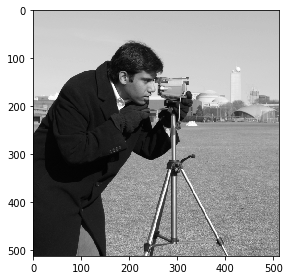

In [210]:
from skimage import data, io

img = data.camera()

io.imshow(img)


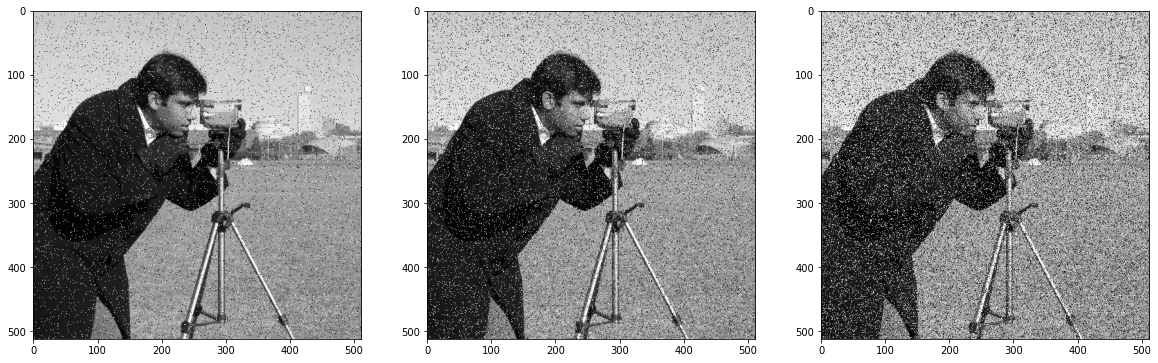

In [211]:
from skimage import util
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

img_sp5 = img_as_ubyte(
    util.random_noise(img, "s&p", amount=5 / 100)
)
img_sp10 = img_as_ubyte(
    util.random_noise(img, "s&p", amount=10 / 100)
)
img_sp20 = img_as_ubyte(
    util.random_noise(img, "s&p", amount=20 / 100)
)

axes[0].imshow(img_sp5,cmap='gray')
axes[1].imshow(img_sp10,cmap='gray')
axes[2].imshow(img_sp20,cmap='gray')


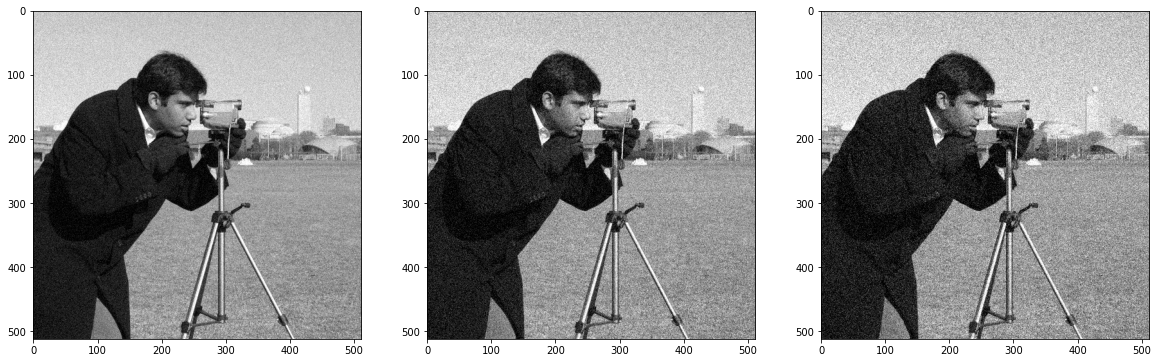

In [212]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

img_gauss005 = img_as_ubyte(util.random_noise(img, var=0.05 * 0.05))
img_gauss008 = img_as_ubyte(util.random_noise(img, var=0.08 * 0.08))
img_gauss01 = img_as_ubyte(util.random_noise(img, var=0.1 * 0.1))

axes[0].imshow(img_gauss005, cmap='gray')
axes[1].imshow(img_gauss008, cmap='gray')
axes[2].imshow(img_gauss01, cmap='gray')


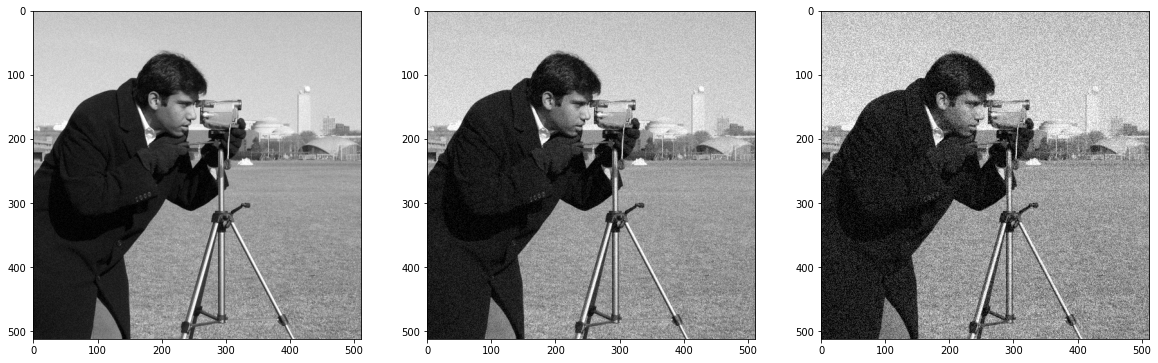

In [213]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

maska10 = np.random.uniform(-10, 10, img.shape)
img_szj10 = np.clip(img + maska10, 0, 255).astype(np.uint8)

maska20 = np.random.uniform(-20, 20, img.shape)
img_szj20 = np.clip(img + maska20, 0, 255).astype(np.uint8)

maska40 = np.random.uniform(-40, 40, img.shape)
img_szj40 = np.clip(img + maska40, 0, 255).astype(np.uint8)

axes[0].imshow(img_szj10, cmap='gray')
axes[1].imshow(img_szj20, cmap='gray')
axes[2].imshow(img_szj40, cmap='gray')


In [214]:
def NMSE(img, img_noisy):
    nmse = 0.0
    nmse = np.sum(np.square(img - img_noisy))/np.sum(np.square(img))
    return nmse

<h1>Zadanie 2<h1>

Filtr medianowy: 
Zaszumione (sól i pieprz 5%): 0.04971444662344915
Odszumione dla disk(1) filtr medianowy: 0.1417244491916913
Odszumione dla disk(2) filtr medianowy: 0.20673153071336617
Odszumione dla square(3) filtr medianowy: 0.1883999086644548

Zaszumione (Gauss 0.05): 0.6490640404388162
Odszumione dla disk(1) filtr medianowy: 0.45716029314514384
Odszumione dla disk(2) filtr medianowy: 0.3585447408936241
Odszumione dla square(3) filtr medianowy: 0.3930763194497528

Zaszumione (jednostajny 10): 0.30341067539085537
Odszumione dla disk(1) filtr medianowy: 0.25449788796198847
Odszumione dla disk(2) filtr medianowy: 0.260019450724533
Odszumione dla square(3) filtr medianowy: 0.2600684581591047


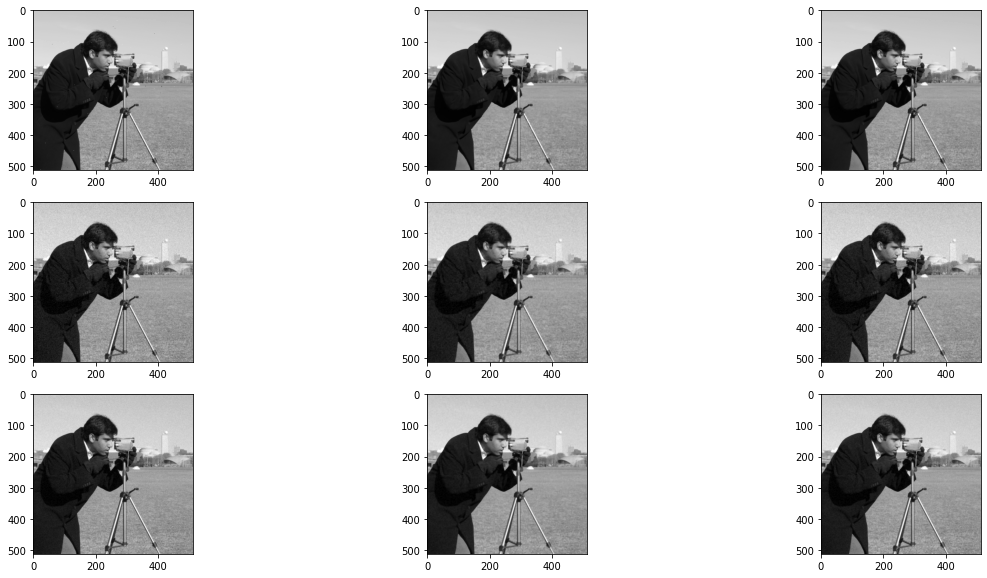

In [215]:
import skimage.filters
from skimage.morphology import disk, square

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

img_sp5_denoised_median_d1 = skimage.filters.median(img_sp5, disk(1))
img_sp5_denoised_median_d2 = skimage.filters.median(img_sp5, disk(2))
img_sp5_denoised_median_s3 = skimage.filters.median(img_sp5, square(3))

img_gauss005_denoised_median_d1 = skimage.filters.median(img_gauss005, disk(1))
img_gauss005_denoised_median_d2 = skimage.filters.median(img_gauss005, disk(2))
img_gauss005_denoised_median_s3 = skimage.filters.median(img_gauss005, square(3))

img_szj10_denoised_median_d1 = skimage.filters.median(img_szj10, disk(1))
img_szj10_denoised_median_d2 = skimage.filters.median(img_szj10, disk(2))
img_szj10_denoised_median_s3 = skimage.filters.median(img_szj10, square(3))

axes[0][0].imshow(img_sp5_denoised_median_d1, cmap="gray")
axes[0][1].imshow(img_sp5_denoised_median_d2, cmap="gray")
axes[0][2].imshow(img_sp5_denoised_median_s3, cmap="gray")

axes[1][0].imshow(img_gauss005_denoised_median_d1, cmap="gray")
axes[1][1].imshow(img_gauss005_denoised_median_d2, cmap="gray")
axes[1][2].imshow(img_gauss005_denoised_median_s3, cmap="gray")

axes[2][0].imshow(img_szj10_denoised_median_d1, cmap="gray")
axes[2][1].imshow(img_szj10_denoised_median_d2, cmap="gray")
axes[2][2].imshow(img_szj10_denoised_median_s3, cmap="gray")

print("Filtr medianowy: ")
print("Zaszumione (sól i pieprz 5%): " + str(NMSE(img, img_sp5)))
print("Odszumione dla disk(1) filtr medianowy: " + str(NMSE(img, img_sp5_denoised_median_d1)))
print("Odszumione dla disk(2) filtr medianowy: " + str(NMSE(img, img_sp5_denoised_median_d2)))
print("Odszumione dla square(3) filtr medianowy: " + str(NMSE(img, img_sp5_denoised_median_s3)))
print()
print("Zaszumione (Gauss 0.05): " + str(NMSE(img, img_gauss005)))
print("Odszumione dla disk(1) filtr medianowy: " + str(NMSE(img, img_gauss005_denoised_median_d1)))
print("Odszumione dla disk(2) filtr medianowy: " + str(NMSE(img, img_gauss005_denoised_median_d2)))
print("Odszumione dla square(3) filtr medianowy: " + str(NMSE(img, img_gauss005_denoised_median_s3)))
print()
print("Zaszumione (jednostajny 10): " + str(NMSE(img, img_szj10)))
print("Odszumione dla disk(1) filtr medianowy: " + str(NMSE(img, img_szj10_denoised_median_d1)))
print("Odszumione dla disk(2) filtr medianowy: " + str(NMSE(img, img_szj10_denoised_median_d2)))
print("Odszumione dla square(3) filtr medianowy: " + str(NMSE(img, img_szj10_denoised_median_s3)))

Filtr uśredniający: 
Zaszumione (sól i pieprz 5%): 0.04971444662344915
Odszumione dla disk(1) filtr uśredniający: 0.3727810322916196
Odszumione dla disk(2) filtr uśredniający: 0.453726229596358
Odszumione dla square(3) filtr uśredniający: 0.4325757855072633

Zaszumione (Gauss 0.05): 0.6490640404388162
Odszumione dla disk(1) filtr uśredniający: 0.40447817799268704
Odszumione dla disk(2) filtr uśredniający: 0.3415469489644575
Odszumione dla square(3) filtr uśredniający: 0.355954012153072

Zaszumione (jednostajny 10): 0.30341067539085537
Odszumione dla disk(1) filtr uśredniający: 0.25034891925276187
Odszumione dla disk(2) filtr uśredniający: 0.2839083123870694
Odszumione dla square(3) filtr uśredniający: 0.2702618642280773


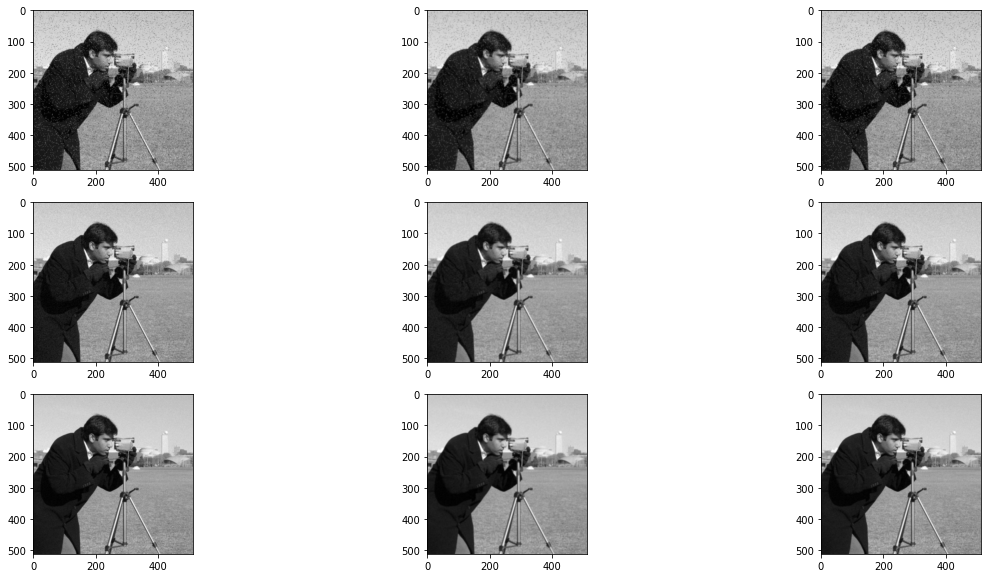

In [216]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

img_sp5_denoised_mean_d1 = skimage.filters.rank.mean(img_sp5, disk(1))
img_sp5_denoised_mean_d2 = skimage.filters.rank.mean(img_sp5, disk(2))
img_sp5_denoised_mean_s3 = skimage.filters.rank.mean(img_sp5, square(3))

img_gauss005_denoised_mean_d1 = skimage.filters.rank.mean(img_gauss005, disk(1))
img_gauss005_denoised_mean_d2 = skimage.filters.rank.mean(img_gauss005, disk(2))
img_gauss005_denoised_mean_s3 = skimage.filters.rank.mean(img_gauss005, square(3))

img_szj10_denoised_mean_d1 = skimage.filters.rank.mean(img_szj10, disk(1))
img_szj10_denoised_mean_d2 = skimage.filters.rank.mean(img_szj10, disk(2))
img_szj10_denoised_mean_s3 = skimage.filters.rank.mean(img_szj10, square(3))

axes[0][0].imshow(img_sp5_denoised_mean_d1, cmap="gray")
axes[0][1].imshow(img_sp5_denoised_mean_d2, cmap="gray")
axes[0][2].imshow(img_sp5_denoised_mean_s3, cmap="gray")

axes[1][0].imshow(img_gauss005_denoised_mean_d1, cmap="gray")
axes[1][1].imshow(img_gauss005_denoised_mean_d2, cmap="gray")
axes[1][2].imshow(img_gauss005_denoised_mean_s3, cmap="gray")

axes[2][0].imshow(img_szj10_denoised_mean_d1, cmap="gray")
axes[2][1].imshow(img_szj10_denoised_mean_d2, cmap="gray")
axes[2][2].imshow(img_szj10_denoised_mean_s3, cmap="gray")

print("Filtr uśredniający: ")
print("Zaszumione (sól i pieprz 5%): " + str(NMSE(img, img_sp5)))
print("Odszumione dla disk(1) filtr uśredniający: " + str(NMSE(img, img_sp5_denoised_mean_d1)))
print("Odszumione dla disk(2) filtr uśredniający: " + str(NMSE(img, img_sp5_denoised_mean_d2)))
print("Odszumione dla square(3) filtr uśredniający: " + str(NMSE(img, img_sp5_denoised_mean_s3)))
print()
print("Zaszumione (Gauss 0.05): " + str(NMSE(img, img_gauss005)))
print("Odszumione dla disk(1) filtr uśredniający: " + str(NMSE(img, img_gauss005_denoised_mean_d1)))
print("Odszumione dla disk(2) filtr uśredniający: " + str(NMSE(img, img_gauss005_denoised_mean_d2)))
print("Odszumione dla square(3) filtr uśredniający: " + str(NMSE(img, img_gauss005_denoised_mean_s3)))
print()
print("Zaszumione (jednostajny 10): " + str(NMSE(img, img_szj10)))
print("Odszumione dla disk(1) filtr uśredniający: " + str(NMSE(img, img_szj10_denoised_mean_d1)))
print("Odszumione dla disk(2) filtr uśredniający: " + str(NMSE(img, img_szj10_denoised_mean_d2)))
print("Odszumione dla square(3) filtr uśredniający: " + str(NMSE(img, img_szj10_denoised_mean_s3)))


Filtr Gaussa: 
Zaszumione (sól i pieprz 5%): 0.04971444662344915
Odszumione dla disk(1) filtr Gaussa: 0.23252834967832425
Odszumione dla disk(2) filtr Gaussa: 0.39114370056787234
Odszumione dla square(3) filtr Gaussa: 0.44831604736693087

Zaszumione (Gauss 0.05): 0.6490640404388162
Odszumione dla disk(1) filtr Gaussa: 0.48520043882877634
Odszumione dla disk(2) filtr Gaussa: 0.35437535534336617
Odszumione dla square(3) filtr Gaussa: 0.3268104800416784

Zaszumione (jednostajny 10): 0.30341067539085537
Odszumione dla disk(1) filtr Gaussa: 0.20498462790780808
Odszumione dla disk(2) filtr Gaussa: 0.23307462295760112
Odszumione dla square(3) filtr Gaussa: 0.2601976946580037


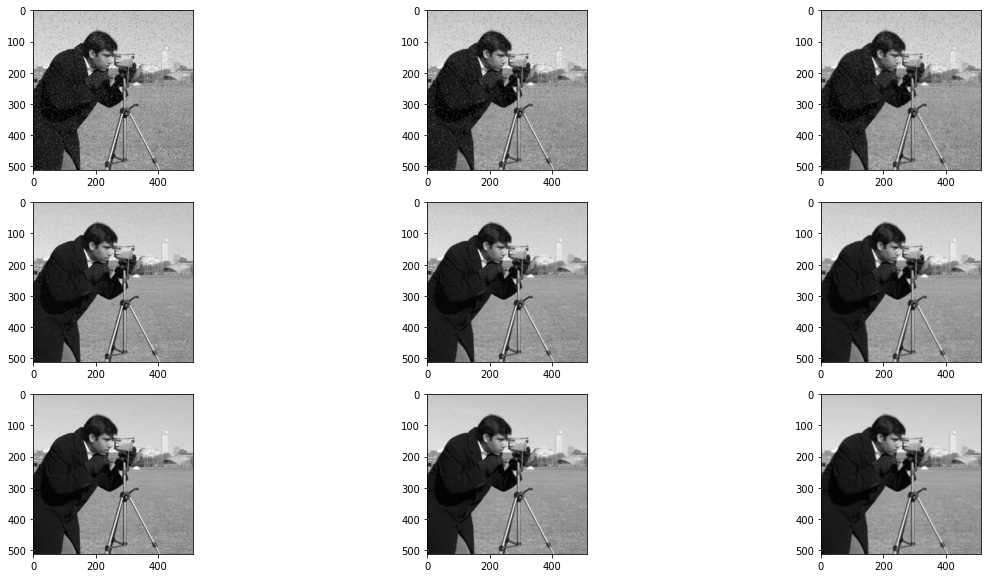

In [217]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

img_sp5_denoised_gaussian_05 = img_as_ubyte(skimage.filters.gaussian(img_sp5, 0.5))
img_sp5_denoised_gaussian_075 = img_as_ubyte(skimage.filters.gaussian(img_sp5, 0.75))
img_sp5_denoised_gaussian_1 = img_as_ubyte(skimage.filters.gaussian(img_sp5, 1))

img_gauss005_denoised_gaussian_05 = img_as_ubyte(skimage.filters.gaussian(img_gauss005, 0.5))
img_gauss005_denoised_gaussian_075 = img_as_ubyte(skimage.filters.gaussian(img_gauss005, 0.75))
img_gauss005_denoised_gaussian_1 = img_as_ubyte(skimage.filters.gaussian(img_gauss005, 1))

img_szj10_denoised_gaussian_05 = img_as_ubyte(skimage.filters.gaussian(img_szj10, 0.5))
img_szj10_denoised_gaussian_075 = img_as_ubyte(skimage.filters.gaussian(img_szj10, 0.75))
img_szj10_denoised_gaussian_1 = img_as_ubyte(skimage.filters.gaussian(img_szj10, 1))

axes[0][0].imshow(img_sp5_denoised_gaussian_05, cmap="gray")
axes[0][1].imshow(img_sp5_denoised_gaussian_075, cmap="gray")
axes[0][2].imshow(img_sp5_denoised_gaussian_1, cmap="gray")

axes[1][0].imshow(img_gauss005_denoised_gaussian_05, cmap="gray")
axes[1][1].imshow(img_gauss005_denoised_gaussian_075, cmap="gray")
axes[1][2].imshow(img_gauss005_denoised_gaussian_1, cmap="gray")

axes[2][0].imshow(img_szj10_denoised_gaussian_05, cmap="gray")
axes[2][1].imshow(img_szj10_denoised_gaussian_075, cmap="gray")
axes[2][2].imshow(img_szj10_denoised_gaussian_1, cmap="gray")

print("Filtr Gaussa: ")
print("Zaszumione (sól i pieprz 5%): " + str(NMSE(img, img_sp5)))
print("Odszumione dla disk(1) filtr Gaussa: " + str(NMSE(img, img_sp5_denoised_gaussian_05)))
print("Odszumione dla disk(2) filtr Gaussa: " + str(NMSE(img, img_sp5_denoised_gaussian_075)))
print("Odszumione dla square(3) filtr Gaussa: " + str(NMSE(img, img_sp5_denoised_gaussian_1)))
print()
print("Zaszumione (Gauss 0.05): " + str(NMSE(img, img_gauss005)))
print("Odszumione dla disk(1) filtr Gaussa: " + str(NMSE(img, img_gauss005_denoised_gaussian_05)))
print("Odszumione dla disk(2) filtr Gaussa: " + str(NMSE(img, img_gauss005_denoised_gaussian_075)))
print("Odszumione dla square(3) filtr Gaussa: " + str(NMSE(img, img_gauss005_denoised_gaussian_1)))
print()
print("Zaszumione (jednostajny 10): " + str(NMSE(img, img_szj10)))
print("Odszumione dla disk(1) filtr Gaussa: " + str(NMSE(img, img_szj10_denoised_gaussian_05)))
print("Odszumione dla disk(2) filtr Gaussa: " + str(NMSE(img, img_szj10_denoised_gaussian_075)))
print("Odszumione dla square(3) filtr Gaussa: " + str(NMSE(img, img_szj10_denoised_gaussian_1)))